<a href="https://colab.research.google.com/github/Ehsan-data/JAVA/blob/master/Stock%20Price%20Prediction%20RNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 ! pip install -q kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/gdive')

Mounted at /content/gdive


In [ ]:
! pip install kaggle

In [ ]:
##! mkdir ~/.kaggle


In [ ]:
##! cp kaggle.json ~/.kaggle/


In [ ]:
##! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
## ! kaggle datasets listnnnn


In [ ]:
! kaggle datasets download rahulsah06/gooogle-stock-price


gooogle-stock-price.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip gooogle-stock-price


Archive:  gooogle-stock-price.zip
replace Google_Stock_Price_Test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Google_Stock_Price_Test.csv  
replace Google_Stock_Price_Train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Google_Stock_Price_Train.csv  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
from keras.models import Sequential  
from keras.layers import Dense 
from keras.layers import SimpleRNN
from keras.layers import Dropout 
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, LSTM, SimpleRNN, GRU, Bidirectional, RNN
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.metrics import mean_squared_error
from itertools import product

In [ ]:
# read in train data

path_train = "/content/Google_Stock_Price_Train.csv"
data = pd.read_csv(path_train,sep =",")

In [ ]:
data.tail

<bound method NDFrame.tail of             Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800
...          ...     ...     ...     ...     ...         ...
1253  12/23/2016  790.90  792.74  787.28  789.91     623,400
1254  12/27/2016  790.68  797.86  787.66  791.55     789,100
1255  12/28/2016  793.70  794.23  783.20  785.05   1,153,800
1256  12/29/2016  783.33  785.93  778.92  782.79     744,300
1257  12/30/2016  782.75  782.78  770.41  771.82   1,770,000

[1258 rows x 6 columns]>

In [ ]:
# We assign column "Open" to variable "Data"
data = data.loc[:,["Open"]].values

train = data[:len(data)-60] 
test = data[len(train):] # last 50 data will be our test data

# reshape
train=train.reshape(train.shape[0],1)

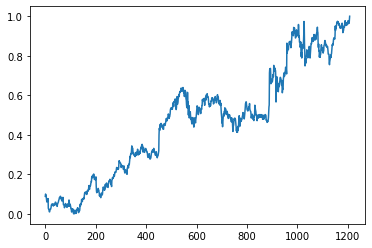

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Scaler
scaler = MinMaxScaler(feature_range= (0,1)) 
train_scaled = scaler.fit_transform(train)

plt.plot(train_scaled)
plt.show()

In [ ]:
# We add first 50 locution to "X_train" and we 51. locution to "y_train" .
X_train = []
y_train = []
timesteps = 50

for i in range(timesteps, train_scaled.shape[0]):
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)


# Reshaping
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Dimension of array is 3.

In [ ]:
# Implementing Simple RNN 

# Initializing RNN
simpModel = Sequential()

# Adding the layers to RNN 
simpModel.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
simpModel.add(Dropout(0.2)) 

simpModel.add(SimpleRNN(units = 60,activation='tanh', return_sequences = True))
simpModel.add(Dropout(0.2))

simpModel.add(SimpleRNN(units = 80,activation='tanh', return_sequences = True))
simpModel.add(Dropout(0.2))

simpModel.add(SimpleRNN(units = 120))
simpModel.add(Dropout(0.2))


simpModel.add(Dense(units = 1))

# Compiling the RNN
simpModel.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fit the model
history = simpModel.fit(X_train, y_train, epochs = 150, batch_size = 16)


Epoch 1/150
73/73 [==============================] - 6s 44ms/step - loss: 0.3741
Epoch 2/150
73/73 [==============================] - 3s 44ms/step - loss: 0.2372
Epoch 3/150
73/73 [==============================] - 3s 44ms/step - loss: 0.1462
Epoch 4/150
73/73 [==============================] - 3s 44ms/step - loss: 0.1116
Epoch 5/150
73/73 [==============================] - 3s 43ms/step - loss: 0.0927
Epoch 6/150
73/73 [==============================] - 3s 44ms/step - loss: 0.0664
Epoch 7/150
73/73 [==============================] - 3s 44ms/step - loss: 0.0604
Epoch 8/150
73/73 [==============================] - 3s 42ms/step - loss: 0.0475
Epoch 9/150
73/73 [==============================] - 3s 43ms/step - loss: 0.0400
Epoch 10/150
73/73 [==============================] - 3s 43ms/step - loss: 0.0327
Epoch 11/150
73/73 [==============================] - 3s 44ms/step - loss: 0.0282
Epoch 12/150
73/73 [==============================] - 3s 43ms/step - loss: 0.0252
Epoch 13/150
73/73 [=====

In [ ]:
simpModel.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_49 (SimpleRNN)    (None, 50, 50)            2600      
_________________________________________________________________
dropout_49 (Dropout)         (None, 50, 50)            0         
_________________________________________________________________
simple_rnn_50 (SimpleRNN)    (None, 50, 60)            6660      
_________________________________________________________________
dropout_50 (Dropout)         (None, 50, 60)            0         
_________________________________________________________________
simple_rnn_51 (SimpleRNN)    (None, 50, 80)            11280     
_________________________________________________________________
dropout_51 (Dropout)         (None, 50, 80)            0         
_________________________________________________________________
simple_rnn_52 (SimpleRNN)    (None, 120)             

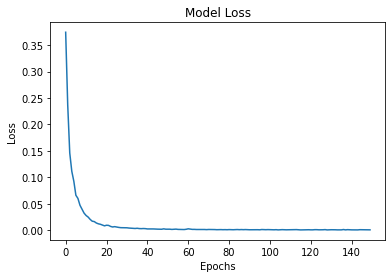

In [ ]:
plt.plot(history.history['loss']) 
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [ ]:
inputs = data[len(data) - len(test) - timesteps:]
inputs = scaler.transform(inputs)  # min max scaler

In [ ]:
X_test = []
for i in range(timesteps, inputs.shape[0]):
    X_test.append(inputs[i-timesteps:i, 0]) # 0 dan 50 ye, 1 den 51 e gibi kaydirarark 50 eleman aliyoruz 
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
predicted_data = simpModel.predict(X_test)
predicted_data = scaler.inverse_transform(predicted_data)

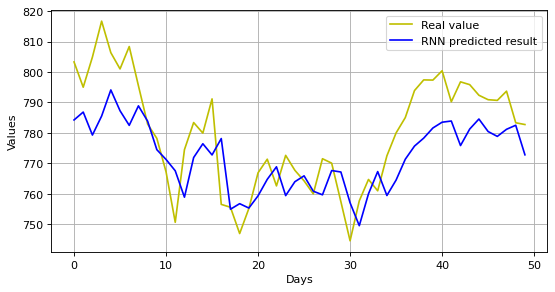

In [ ]:
plt.figure(figsize=(7,3), dpi=70, facecolor='w', edgecolor='k')
plt.plot(test,color="y",label="Real value")
plt.plot(predicted_data,color="b",label="RNN predicted result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

In [ ]:
# building LSTM 
lstmModel = Sequential()
lstmModel.add(LSTM(10, input_shape=(None,1))) #10 LSTM blocks.
lstmModel.add(Dense(1))
lstmModel.compile(loss='mean_squared_error', optimizer='adam')
lstmModel.fit(X_train, y_train, epochs=50, batch_size=1)


Epoch 1/50
1158/1158 [==============================] - 13s 9ms/step - loss: 0.0133
Epoch 2/50
1158/1158 [==============================] - 11s 9ms/step - loss: 0.0011
Epoch 3/50
1158/1158 [==============================] - 11s 9ms/step - loss: 8.7448e-04
Epoch 4/50
1158/1158 [==============================] - 11s 9ms/step - loss: 7.2392e-04
Epoch 5/50
1158/1158 [==============================] - 10s 9ms/step - loss: 6.4926e-04
Epoch 6/50
1158/1158 [==============================] - 10s 9ms/step - loss: 5.5899e-04
Epoch 7/50
1158/1158 [==============================] - 10s 9ms/step - loss: 5.0152e-04
Epoch 8/50
1158/1158 [==============================] - 10s 9ms/step - loss: 4.4918e-04
Epoch 9/50
1158/1158 [==============================] - 10s 9ms/step - loss: 4.1847e-04
Epoch 10/50
1158/1158 [==============================] - 11s 9ms/step - loss: 3.9050e-04
Epoch 11/50
1158/1158 [==============================] - 11s 9ms/step - loss: 3.6422e-04
Epoch 12/50
1158/1158 [===============

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [ ]:
predicted_data2=lstmModel.predict(X_test)
predicted_data2=scaler.inverse_transform(predicted_data2)

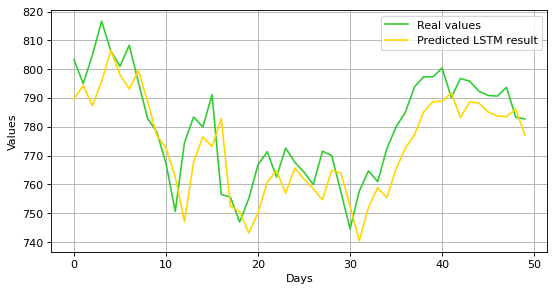

In [ ]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="g",label="Real values")
plt.plot(predicted_data2,color="y",label="Predicted LSTM ")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

In [ ]:
# RNN SimpleModel2

from keras.models import Sequential  
from keras.layers import Dense 
from keras.layers import SimpleRNN
from keras.layers import Dropout 

# Initialisiation
SimpleModel2 = Sequential()


SimpleModel2.add(SimpleRNN(units = 100,activation='relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
SimpleModel2.add(Dropout(0.2))


SimpleModel2.add(SimpleRNN(units = 50))
SimpleModel2.add(Dropout(0.2))


# output layer
SimpleModel2.add(Dense(units = 1)) 

# Compiling 
SimpleModel2.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting RNN 
history = SimpleModel2.fit(X_train, y_train, epochs = 200, batch_size = 16)


Epoch 1/200
73/73 [==============================] - 3s 23ms/step - loss: 0.0354
Epoch 2/200
73/73 [==============================] - 2s 24ms/step - loss: 0.0124
Epoch 3/200
73/73 [==============================] - 2s 23ms/step - loss: 0.0089
Epoch 4/200
73/73 [==============================] - 2s 24ms/step - loss: 0.0064
Epoch 5/200
73/73 [==============================] - 2s 23ms/step - loss: 0.0059
Epoch 6/200
73/73 [==============================] - 2s 23ms/step - loss: 0.0046
Epoch 7/200
73/73 [==============================] - 2s 24ms/step - loss: 0.0043
Epoch 8/200
73/73 [==============================] - 2s 24ms/step - loss: 0.0038
Epoch 9/200
73/73 [==============================] - 2s 23ms/step - loss: 0.0040
Epoch 10/200
73/73 [==============================] - 2s 24ms/step - loss: 0.0033
Epoch 11/200
73/73 [==============================] - 2s 23ms/step - loss: 0.0032
Epoch 12/200
73/73 [==============================] - 2s 22ms/step - loss: 0.0033
Epoch 13/200
73/73 [=====

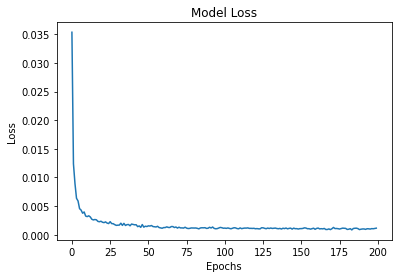

In [ ]:
plt.plot(history.history['loss']) 
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [ ]:
predicted_data_modified = SimpleModel2.predict(X_test)
predicted_data_modified = scaler.inverse_transform(predicted_data_modified)

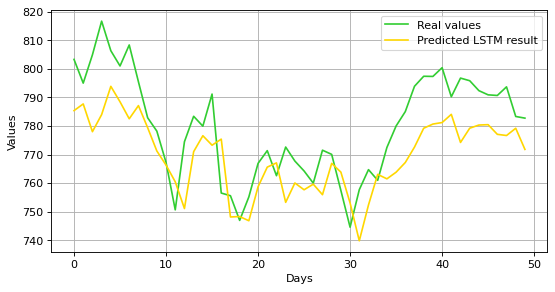

In [ ]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="LimeGreen",label="Real values")
plt.plot(predicted_data_modified,color="Gold",label="Predicted LSTM result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

In [ ]:
path_test = "//content/Google_Stock_Price_Test.csv"
test_data = pd.read_csv(path_test, sep =",")

path_train = "/content/Google_Stock_Price_Train.csv"
trainn_data = pd.read_csv(path_train,sep =",")




In [ ]:
real_stock_price = test_data.iloc[:,1:2].values
training_set = trainn_data.iloc[:, 1:2].values

In [ ]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((trainn_data['Open'], test_data['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = SimpleModel2.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)


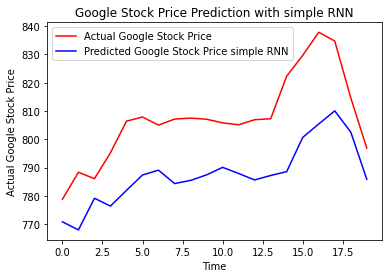

In [ ]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Actual Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price simple RNN')
plt.title('Google Stock Price Prediction with simple RNN')
plt.xlabel('Time')
plt.ylabel('Actual Google Stock Price')
plt.legend()
plt.show()

In [ ]:
#LSTM Model2

In [ ]:

lstmModel2 = Sequential()
lstmModel2.add(LSTM(10, input_shape=(None,1)))
lstmModel2.add(Dense(1))
lstmModel2.compile(loss='mean_squared_error', optimizer='adam')
history = lstmModel2.fit(X_train, y_train, epochs=250, batch_size=5)

Epoch 1/250
232/232 [==============================] - 6s 17ms/step - loss: 0.0201
Epoch 2/250
232/232 [==============================] - 4s 17ms/step - loss: 9.4215e-04
Epoch 3/250
232/232 [==============================] - 4s 17ms/step - loss: 9.5740e-04
Epoch 4/250
232/232 [==============================] - 4s 17ms/step - loss: 8.4279e-04
Epoch 5/250
232/232 [==============================] - 4s 17ms/step - loss: 7.5772e-04
Epoch 6/250
232/232 [==============================] - 4s 17ms/step - loss: 7.6151e-04
Epoch 7/250
232/232 [==============================] - 4s 18ms/step - loss: 7.2369e-04
Epoch 8/250
232/232 [==============================] - 4s 18ms/step - loss: 6.9259e-04
Epoch 9/250
232/232 [==============================] - 4s 18ms/step - loss: 6.3544e-04
Epoch 10/250
232/232 [==============================] - 4s 18ms/step - loss: 6.0364e-04
Epoch 11/250
232/232 [==============================] - 4s 18ms/step - loss: 6.0899e-04
Epoch 12/250
232/232 [=======================

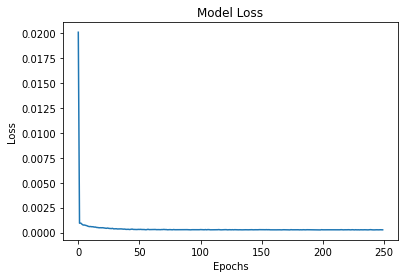

In [ ]:
plt.plot(history.history['loss']) 
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [ ]:
predicted_data3_modified=lstmModel2.predict(X_test)
predicted_data3_modified=scaler.inverse_transform(predicted_data3_modified)

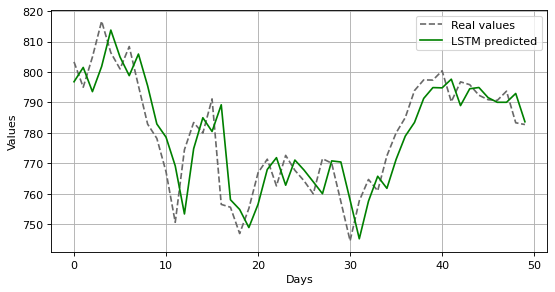

In [ ]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="DimGray",label="Real values", linestyle="dashed")
plt.plot(predicted_data3_modified,color="g", label="LSTM predicted")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

In [ ]:
path_test = "//content/Google_Stock_Price_Test.csv"
test_data = pd.read_csv(path_test, sep =",")

path_train = "/content/Google_Stock_Price_Train.csv"
trainn_data = pd.read_csv(path_train,sep =",")

In [ ]:
real_stock_price = test_data.iloc[:,1:2].values
training_set = trainn_data.iloc[:, 1:2].values

In [ ]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((trainn_data['Open'], test_data['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = lstmModel2.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

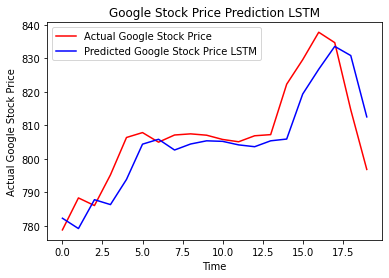

In [ ]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Actual Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price LSTM')
plt.title('Google Stock Price Prediction LSTM')
plt.xlabel('Time')
plt.ylabel('Actual Google Stock Price')
plt.legend()
plt.show()